In [81]:
import numpy as np 
import pandas as pd 

In [82]:
df=pd.read_csv(r"C:\Users\cl501_26\Downloads\phiusiil+phishing+url+dataset\PhiUSIIL_Phishing_URL_Dataset.csv")
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [83]:
df.drop(["FILENAME","URL","URLLength","Domain","Title"],axis=1,inplace=True)

In [84]:
df.head()

,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,24,0,com,100.0,1.000000,0.522907,0.061933,3,1,0,...,0,0,1,34,20,28,119,0,124,1
1,16,0,de,100.0,0.666667,0.032650,0.050207,2,1,0,...,0,0,1,50,9,8,39,0,217,1
2,22,0,uk,100.0,0.866667,0.028555,0.064129,2,2,0,...,0,0,1,10,2,7,42,2,5,1
3,19,0,com,100.0,1.000000,0.522907,0.057606,3,1,0,...,1,1,1,3,27,15,22,1,31,1
4,26,0,org,100.0,1.000000,0.079963,0.059441,3,1,0,...,1,0,1,244,15,34,72,1,85,1


### One-Hot Encoding for TLD Column

In [85]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder(sparse_output=False)

tld = pd.DataFrame(df["TLD"])

TLD_encoded = one.fit_transform(tld)
# Convert the result to a DataFrame with appropriate column names
TLD_encoded_df = pd.DataFrame(TLD_encoded, columns=one.get_feature_names_out(['TLD']))

print(TLD_encoded_df)

        TLD_100  TLD_101  TLD_103  TLD_106  TLD_107  TLD_108  TLD_11  TLD_110  \
0           0.0      0.0      0.0      0.0      0.0      0.0     0.0      0.0   
1           0.0      0.0      0.0      0.0      0.0      0.0     0.0      0.0   
2           0.0      0.0      0.0      0.0      0.0      0.0     0.0      0.0   
3           0.0      0.0      0.0      0.0      0.0      0.0     0.0      0.0   
4           0.0      0.0      0.0      0.0      0.0      0.0     0.0      0.0   
...         ...      ...      ...      ...      ...      ...     ...      ...   
235790      0.0      0.0      0.0      0.0      0.0      0.0     0.0      0.0   
235791      0.0      0.0      0.0      0.0      0.0      0.0     0.0      0.0   
235792      0.0      0.0      0.0      0.0      0.0      0.0     0.0      0.0   
235793      0.0      0.0      0.0      0.0      0.0      0.0     0.0      0.0   
235794      0.0      0.0      0.0      0.0      0.0      0.0     0.0      0.0   

        TLD_111  TLD_116  .

In [86]:
"""final_df = pd.merge(df,TLD_encoded_df,left_index=True, right_index=True)
final_df.head()"""

'final_df = pd.merge(df,TLD_encoded_df,left_index=True, right_index=True)\nfinal_df.head()'

### Removing Label from the DataSet

In [87]:
df.drop(["label","TLD"],axis=1,inplace=True)
X =df.copy()

In [88]:
print(X)

        DomainLength  IsDomainIP  URLSimilarityIndex  CharContinuationRate  \
0                 24           0          100.000000              1.000000   
1                 16           0          100.000000              0.666667   
2                 22           0          100.000000              0.866667   
3                 19           0          100.000000              1.000000   
4                 26           0          100.000000              1.000000   
...              ...         ...                 ...                   ...   
235790            22           0          100.000000              1.000000   
235791            21           0          100.000000              0.785714   
235792            23           0          100.000000              1.000000   
235793            47           0           28.157537              0.465116   
235794            26           0          100.000000              1.000000   

        TLDLegitimateProb  URLCharProb  TLDLength  NoOfSubDomai

### Feature Selection 

1. Scaling 

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
scaled_df

,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,0.276436,-0.052087,0.744382,0.713153,1.043145,0.584293,0.392745,-0.274154,-0.045399,-0.01325,...,2.620780,-0.557340,-0.155042,1.02681,0.099788,0.182551,0.783327,0.305222,-0.134778,0.464130
1,-0.597807,-0.052087,0.744382,-0.825555,-0.905197,-0.523283,-1.274652,-0.274154,-0.045399,-0.01325,...,-0.381566,-0.557340,-0.155042,1.02681,0.301270,0.035622,-0.113046,-0.147555,-0.134778,1.041672
2,0.057875,-0.052087,0.744382,0.097670,-0.921472,0.791672,-1.274652,1.389828,-0.045399,-0.01325,...,-0.381566,-0.557340,-0.155042,1.02681,-0.202435,-0.057878,-0.157865,-0.130576,-0.021406,-0.274876
3,-0.269966,-0.052087,0.744382,0.713153,1.043145,0.175546,0.392745,-0.274154,-0.045399,-0.01325,...,-0.381566,1.794238,6.449862,1.02681,-0.290583,0.276051,0.200684,-0.243770,-0.078092,-0.113413
4,0.494997,-0.052087,0.744382,0.713153,-0.717171,0.348931,0.392745,-0.274154,-0.045399,-0.01325,...,2.620780,1.794238,-0.155042,1.02681,2.744236,0.115765,1.052238,0.039216,-0.078092,0.221935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,0.057875,-0.052087,0.744382,0.713153,1.043145,0.282549,0.392745,-0.274154,-0.045399,-0.01325,...,-0.381566,1.794238,-0.155042,1.02681,0.313862,0.008908,0.469596,0.690083,-0.021406,0.880209
235791,-0.051405,-0.052087,0.744382,-0.276016,-0.921472,-0.180723,-1.274652,1.389828,-0.045399,-0.01325,...,-0.381566,1.794238,-0.155042,-0.97389,0.301270,-0.071235,-0.157865,0.129771,-0.134778,-0.113413
235792,0.167156,-0.052087,0.744382,0.713153,-1.021764,0.693888,-1.274652,-0.274154,-0.045399,-0.01325,...,-0.381566,-0.557340,-0.155042,1.02681,0.011639,0.048979,0.872964,-0.040021,-0.021406,0.110152
235793,2.789885,-0.052087,-1.734996,-1.755936,-1.031133,-0.522953,0.392745,1.389828,-0.045399,-0.01325,...,-0.381566,-0.557340,-0.155042,-0.97389,-0.328361,-0.084592,-0.337140,-0.368284,-0.134778,-0.305927


2. Using PCA 

In [92]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_df)

PCA()

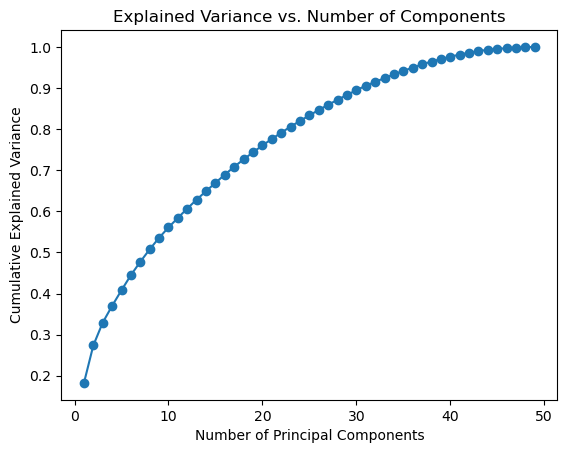

In [93]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming pca is already fit to your data
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure()
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

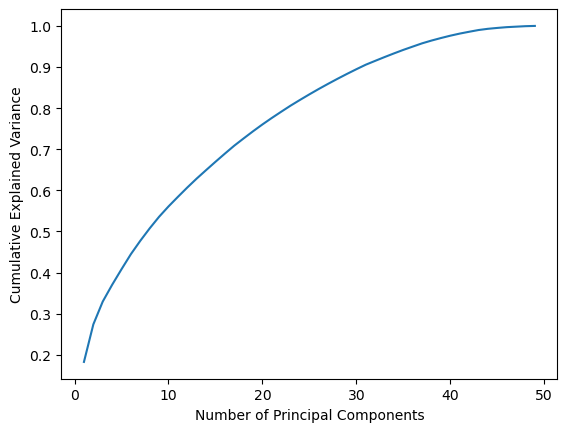

In [94]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum())
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()